Q1. 
Generate spikes for 10 s (or longer if you want better statistics) using a Poisson spike generator with a constant rate of 100 Hz, and record
their times of occurrence. Compute the coefficient of variation of the
interspike intervals, and the Fano factor for spike counts obtained over counting intervals ranging from 1 to  100 ms. Plot the interspike interval histogram

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
%matplotlib inline

Modeling Poisson spiking neurons
initilising

In [20]:
dt = 1/1000   # Length of time intervals
T = 10         #time of simulation
r = 100         #firing rate in spikes per second
p = r*dt      #Probability of a spike in a very small time interval

n_trials = 500 # Total number of trials that we will simulate

In [21]:
isi = np.zeros(0)
spike_count = np.zeros(n_trials)
for t in range(n_trials):
    spikes = np.random.rand(int(T/dt))
    spikes[spikes < p] = 1
    spikes[spikes < 1] = 0
    spike_count[t] = np.sum(spikes)
    isi = np.append(isi,np.diff(np.where(spikes==1)[0]))

In [22]:
print(np.mean(spike_count))
print(np.var(spike_count))

998.59
841.2738999999999


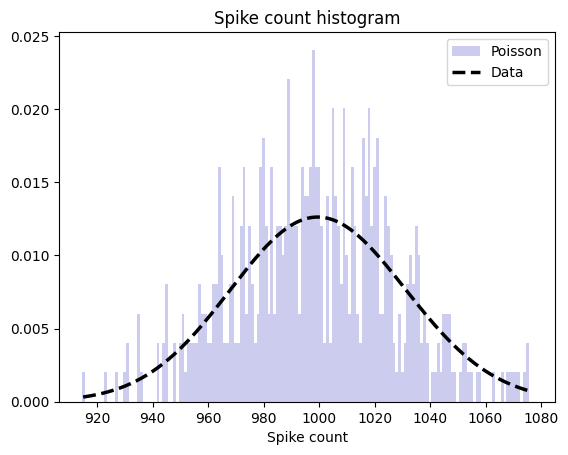

In [24]:
bins = np.arange(np.min(spike_count),np.max(spike_count),1)
plt.hist(spike_count, bins-0.5, density=True, color=(0.0,0.0,0.7,0.2),histtype='stepfilled') # We subtract -0.5 because the values in bins represent the edges
plt.plot(bins,poisson.pmf(bins,mu=r*T),'--k',linewidth=2.5)
plt.title('Spike count histogram')
plt.xlabel('Spike count')
plt.legend(['Poisson','Data'])

Poisson process can be shown that this results in an exponential distribution:

Mean: 10.006134784831444


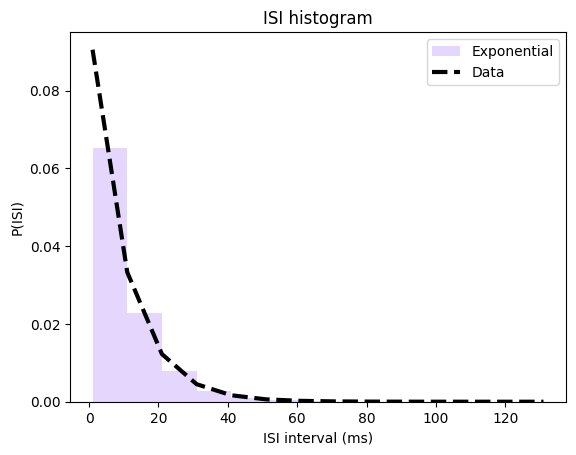

In [34]:
bins = np.arange(np.min(isi),np.max(isi),10)
plt.hist(isi,bins,density = True, color=(.5, .2, 0.99, 0.2), histtype='stepfilled')
plt.plot(bins,r*dt*np.exp(-r*bins*dt),'--k',linewidth=3.0)
plt.title('ISI histogram')
plt.xlabel('ISI interval (ms)')
plt.ylabel('P(ISI)')
plt.legend(['Exponential','Data'])
print('Mean: ' + str(np.mean(isi)))

Coefficient of Variation (CV) of ISI: 0.9504
Fano Factor: 0.9566


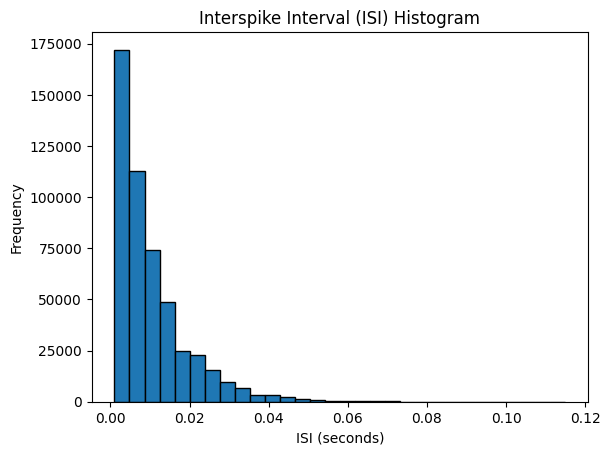

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 1 / 1000   # Length of time intervals in seconds (1 ms)
T = 10          # Time of simulation in seconds
r = 100         # Firing rate in spikes per second
p = r * dt      # Probability of a spike in a small time interval
n_trials = 500  # Number of trials

# Initialize arrays to store spike counts and ISI
isi = np.zeros(0)
spike_count = np.zeros(n_trials)

# Spike generation and ISI calculation
for t in range(n_trials):
    spikes = np.random.rand(int(T / dt))  # Random numbers for each time step
    spikes[spikes < p] = 1  # Mark time points with spikes
    spikes[spikes < 1] = 0  # Mark the rest with 0 (no spikes)
    
    spike_count[t] = np.sum(spikes)  # Count total spikes for each trial
    
    # Calculate interspike intervals (ISI)
    spike_times = np.where(spikes == 1)[0]  # Get time steps where spikes occur
    isi = np.append(isi, np.diff(spike_times) * dt)  # Append ISI in seconds

# Compute coefficient of variation (CV) of ISI
cv = np.std(isi) / np.mean(isi)
print(f"Coefficient of Variation (CV) of ISI: {cv:.4f}")

# Compute Fano factor for spike counts
fano_factor = np.var(spike_count) / np.mean(spike_count)
print(f"Fano Factor: {fano_factor:.4f}")

# Plot ISI histogram
plt.figure()
plt.hist(isi, bins=30, edgecolor='black')
plt.title('Interspike Interval (ISI) Histogram')
plt.xlabel('ISI (seconds)')
plt.ylabel('Frequency')
plt.show()


In [1]:
# This is a pack of basic signal generation and processing algorithms based on pytorch, support cuda.

import numpy as np
import torch

class Signal:
    def __init__(self, length, batch_size=1, device='cpu'):
        self.data = torch.empty(size=[batch_size, length], device=device)
        self.length = length
        self.batch_size = batch_size
        self.device = device
        self.size = [batch_size, length]

    def __str__(self):
        return 'Signal of size {}*{}. Device: {}'\
            .format(self.batch_size, self.length, self.device)


class BinarySignal(Signal):
    def __init__(self, length, batch_size=1, device='cpu'):
        super(BinarySignal, self).__init__(length, batch_size, device)

    def random_generate(self, p=0.5):
        tmp = torch.rand(self.size)
        tmp[tmp < (1 - p)] = 0
        tmp[tmp > (1 - p)] = 1
        self.data = tmp.to(device=self.device, dtype=torch.uint8)

    def ones(self):
        self.data = torch.ones(size=self.size, dtype=torch.uint8, device=self.device)

    def zeros(self):
        self.data = torch.zeros(size=self.size, dtype=torch.uint8, device=self.device)

    def ones_ratio(self):
        return self.data.sum().float() / (self.batch_size * self.length)


if __name__ == '__main__':
    signal = BinarySignal(100, 10, device='cpu')
    signal.random_generate()
    print(signal.ones_ratio())

tensor(0.5070)
